# Travaux pratiques : Séance 2
## Troisième partie

Importation des librairies et des modules nécessaires

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Importation du dataset et sauvegarde de la partie data/target

In [2]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target

### Le but

Le but de la troisième partie de cette séance est de faire un choix concernant la valeur de l’hyperpara-
mètre max_leaf_nodes. En effet, dans la première et deuxième partie, vous avez observé que la valeur
des paramètres ont un impact significatif sur la performance d’un modèle. Il est donc crucial de trouver
les meilleures valeurs possibles pour les hyperparamètres d’un modèle afin que celui-ci produise des
résultats compétitifs.

    
Générez des arbres de décision avec l’hyperparamètres max_leaf_nodes prenant des valeurs entre 2 et
30 (29 arbres de décisions seront donc générés et entraînés). Pour chaque arbre, calculez l’accuracy sur
l’ensemble d’entraînement et de test, puis affichez ces valeurs sur un même graphique. Ce graphique
doit représenter les accuracy en fonction de la valeur de l’hyperparamètre max_leaf_nodes.

Pour réaliser une telle opération, il est préférable <b>de diviser les données en trois parties :

- <b>entraînement
- <b>validation
- <b>tests

<b>L'entraînement</b> sera effectuée sur les données de entraînement

Nous choisirons <b>le meilleur modèle</b> en vérifiant l'exactitude des données de <b>validation</b>

Enfin nous vérifierons <b>le résultat final</b> sur les données de <b>test

<b>1. Division des données en un ensemble d'entrainement et un ensemble de test

In [3]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.1, random_state=21) 

<b>Division des données d'entrainement en un ensemble d'entrainement et un ensemble de validation

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.33, random_state=42) 

### Boucle

Boucle générant 29 arbres de décision (1 pour chaque valeur du paramètre max_leaf_nodes entre 2 et 30), calcul de l'accuracy sur l'ensemble d'entrainement et de test, et affichage des accuracy en fonction de la valeur de max_leaf_nodes

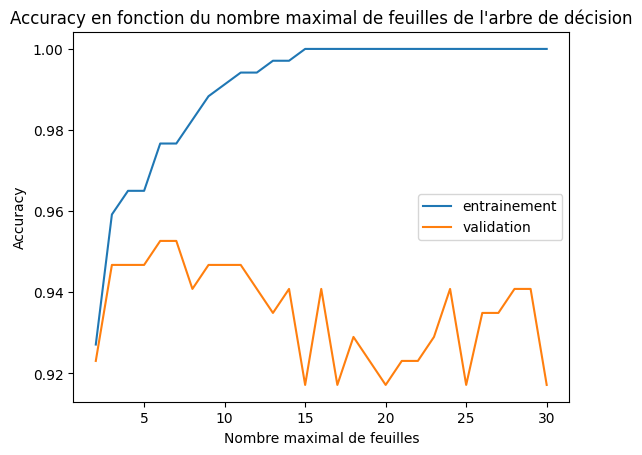

In [5]:
list_accuracy_train = []
list_accuracy_val = []

for i in range(2,31):
    clf =  DecisionTreeClassifier(max_leaf_nodes=i)
    clf.fit(x_train,y_train)
    
    y_pred_train = clf.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    list_accuracy_train.append(accuracy_train)
    
    y_pred_val = clf.predict(x_val)
    accuracy_val = accuracy_score(y_pred_val,y_val)
    list_accuracy_val.append(accuracy_val)

plt.plot(range(2,31), list_accuracy_train, label = 'entrainement')
plt.plot(range(2,31),list_accuracy_val, label = 'validation')

plt.xlabel("Nombre maximal de feuilles")
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du nombre maximal de feuilles de l'arbre de décision")
plt.legend()

plt.show()

Création du meilleur modèle

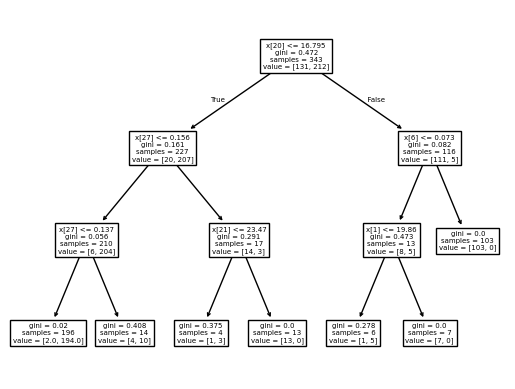

In [6]:
best_clf =  DecisionTreeClassifier(max_leaf_nodes=7)
best_clf.fit(x_train, y_train)
plot_tree(best_clf)
plt.show()

Calcul des métriques pour évaluer la performance du modèle

In [7]:
y_pred_test = best_clf.predict(x_test)
accuracy_test = accuracy_score( y_test,y_pred_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)
precision = precision_score(y_test,y_pred_test)
print("Précision : ", precision)
recall = recall_score(y_test,y_pred_test)
print("Recall : ", recall)
f1 = f1_score(y_test,y_pred_test)
print("F1-score : ", f1)
conf_mat = confusion_matrix(y_test, y_pred_test, normalize='all')
print("Matrice de confusion :\n", conf_mat)

Accuracy de l'ensemble de test :  0.9649122807017544
Précision :  0.9534883720930233
Recall :  1.0
F1-score :  0.9761904761904762
Matrice de confusion :
 [[0.24561404 0.03508772]
 [0.         0.71929825]]


### Conclusions

• Pour choisir la valeur de l’hyperparamètre, l’ensemble d’entraînement et de test sont-ils suffisants ? Pourquoi ? 

• Est-ce que ce graphe correspond à la théorie ? Pourquoi ?

• Pouvez-vous repérer les cas d’underfitting et d’overfitting dans le graphique ?

• Quelle valeur choisissez-vous pour l’hyperparamètre max_leaf_nodes ? Pourquoi ? <b>7

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier(
    n_estimators=1000,      # number of trees
    max_features="sqrt",   # random feature subset
    oob_score=True,        # use out-of-bag samples
    random_state=42
)
rf.fit(x_train_val, y_train_val)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",1000
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

In [10]:
y_pred_test = rf.predict(x_test)
accuracy_test = accuracy_score( y_test,y_pred_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)
precision = precision_score(y_test,y_pred_test)
print("Précision : ", precision)
recall = recall_score(y_test,y_pred_test)
print("Recall : ", recall)
f1 = f1_score(y_test,y_pred_test)
print("F1-score : ", f1)
conf_mat = confusion_matrix(y_test, y_pred_test, normalize='all')
print("Matrice de confusion :\n", conf_mat)

Accuracy de l'ensemble de test :  0.9473684210526315
Précision :  0.9523809523809523
Recall :  0.975609756097561
F1-score :  0.963855421686747
Matrice de confusion :
 [[0.24561404 0.03508772]
 [0.01754386 0.70175439]]
